In [76]:
# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [78]:
font_path = r"C:\Windows\Fonts\malgun.ttf"  # 정확한 파일명으로 변경
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())

In [79]:
train_df =  pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\data\2022서울시교통사고현황-데이터셋.csv",encoding = 'euc-kr')
test_df = pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\data\2023서울시교통사고현황-데이터셋.csv",encoding = 'euc-kr')

## 데이터 확인

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33698 entries, 0 to 33697
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        33698 non-null  float64
 1   사고일시        33698 non-null  object 
 2   요일          33698 non-null  object 
 3   시군구         33698 non-null  object 
 4   사고내용        33698 non-null  object 
 5   사망자수        33698 non-null  int64  
 6   중상자수        33698 non-null  int64  
 7   경상자수        33698 non-null  int64  
 8   부상신고자수      33698 non-null  int64  
 9   사고유형        33698 non-null  object 
 10  법규위반        33698 non-null  object 
 11  노면상태        33698 non-null  object 
 12  기상상태        33698 non-null  object 
 13  도로형태        33698 non-null  object 
 14  가해운전자 차종    33698 non-null  object 
 15  가해운전자 성별    33698 non-null  object 
 16  가해운전자 연령    33698 non-null  object 
 17  가해운전자 상해정도  33698 non-null  object 
 18  피해운전자 차종    32705 non-null  object 
 19  피해운전자 성별    32705 non-nul

In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33811 entries, 0 to 33810
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        33811 non-null  float64
 1   사고일시        33811 non-null  object 
 2   요일          33811 non-null  object 
 3   시군구         33811 non-null  object 
 4   사고내용        33811 non-null  object 
 5   사망자수        33811 non-null  int64  
 6   중상자수        33811 non-null  int64  
 7   경상자수        33811 non-null  int64  
 8   부상신고자수      33811 non-null  int64  
 9   사고유형        33811 non-null  object 
 10  법규위반        33811 non-null  object 
 11  노면상태        33811 non-null  object 
 12  기상상태        33811 non-null  object 
 13  도로형태        33811 non-null  object 
 14  가해운전자 차종    33811 non-null  object 
 15  가해운전자 성별    33811 non-null  object 
 16  가해운전자 연령    33811 non-null  object 
 17  가해운전자 상해정도  33811 non-null  object 
 18  피해운전자 차종    32791 non-null  object 
 19  피해운전자 성별    32791 non-nul

In [82]:
train_df.describe(include='all')

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,ECLO
count,3.369800e+04,33698,33698,33698,33698,33698.000000,33698.000000,33698.000000,33698.000000,33698,...,33698,33698,33698,33698,33698,32705,32705,32705,32705,33698.000000
unique,NaN,7940,7,458,4,NaN,NaN,NaN,NaN,16,...,11,12,3,88,6,12,3,97,6,NaN
top,NaN,2022년 11월 18일 18시,금요일,서울특별시 강남구 역삼동,경상사고,NaN,NaN,NaN,NaN,차대차 - 측면충돌,...,단일로 - 기타,승용,남,61세,상해없음,승용,남,30세,경상,NaN
freq,NaN,19,5444,781,24265,NaN,NaN,NaN,NaN,9851,...,16324,21506,26329,856,25949,14799,23983,821,21835,NaN
mean,2.020000e+15,NaN,NaN,NaN,NaN,0.006558,0.229687,1.019259,0.096207,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.368004
std,0.000000e+00,NaN,NaN,NaN,NaN,0.082895,0.465003,0.907060,0.339333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.905733
min,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


1. 노면상태가 '건조'인 데이터가 대부분
2. 사고유형이 '차대차'인 데이터가 대부분
3. 기상상태가 '맑음'인 데이터가 대부분

In [83]:
test_df.describe(include='all')

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,ECLO
count,3.381100e+04,33811,33811,33811,33811,33811.000000,33811.000000,33811.000000,33811.000000,33811,...,33811,33811,33811,33811,33811,32791,32791,32791,32791,33811.000000
unique,NaN,7969,7,456,4,NaN,NaN,NaN,NaN,17,...,11,11,3,87,6,12,3,98,6,NaN
top,NaN,2023년 10월 26일 18시,금요일,서울특별시 강남구 역삼동,경상사고,NaN,NaN,NaN,NaN,차대차 - 측면충돌,...,단일로 - 기타,승용,남,62세,상해없음,승용,남,32세,경상,NaN
freq,NaN,23,5609,776,24236,NaN,NaN,NaN,NaN,10083,...,16053,21939,26236,856,26328,15468,23778,805,21862,NaN
mean,2.020000e+15,NaN,NaN,NaN,NaN,0.005324,0.230960,1.007512,0.104700,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.335276
std,0.000000e+00,NaN,NaN,NaN,NaN,0.073980,0.470025,0.931776,0.380979,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.062908
min,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,2.020000e+15,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


## EDA

In [84]:
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)

In [85]:
train_df['사고유형'] = train_df['사고유형'].str.split(' - ').str[0]
test_df['사고유형'] = test_df['사고유형'].str.split(' - ').str[0]

### 도로 형태별 사고 유형 (count plot)

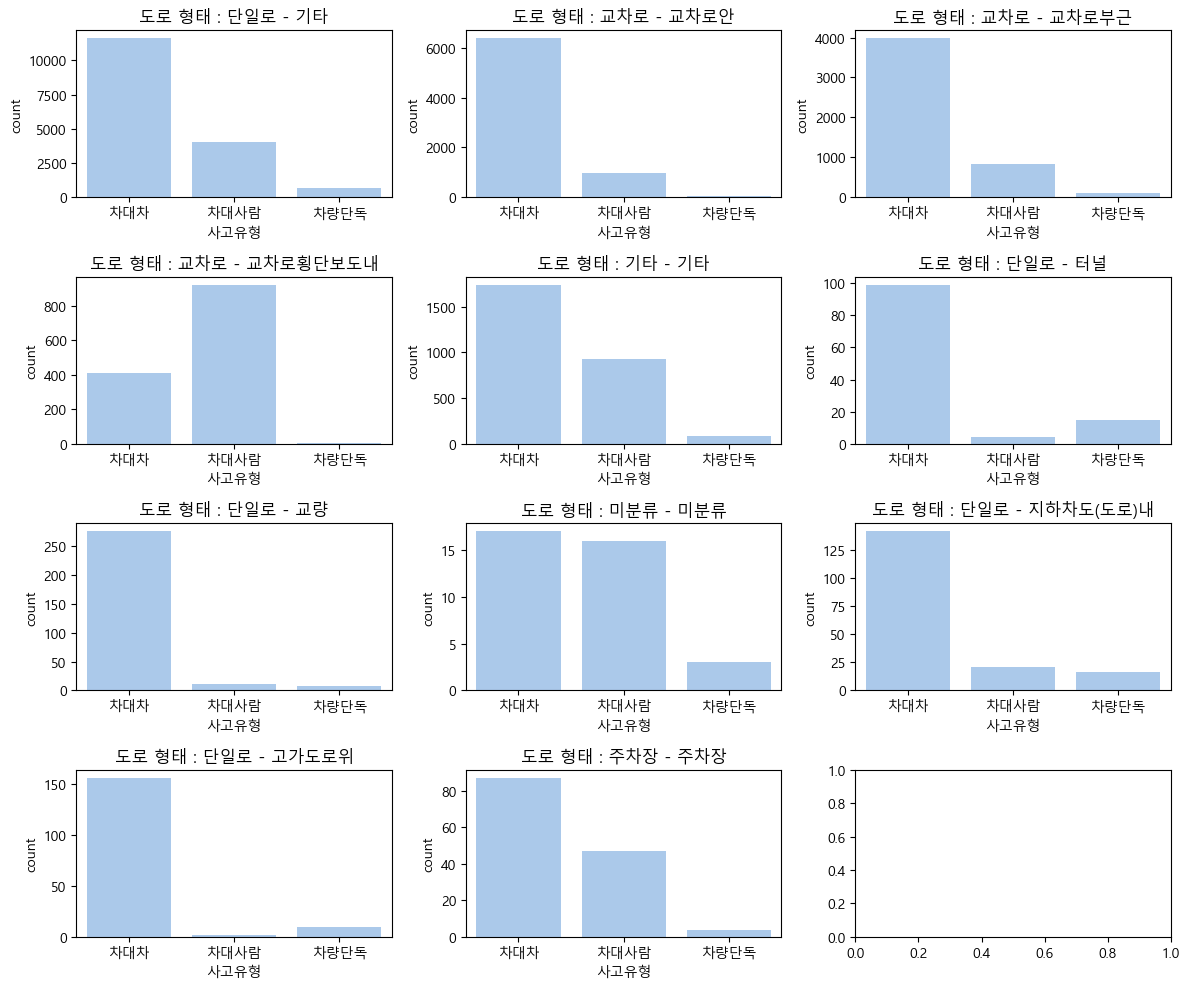

In [86]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_df['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_df['도로형태'].unique()):
    sns.countplot(x='사고유형', data=train_df[train_df['도로형태'] == k], ax=ax, order=x_order)
    ax.set_title(f"도로 형태 : {k}")

plt.tight_layout()
plt.show()

### 도로 형태/사고유형별 ECLO (violin plot)

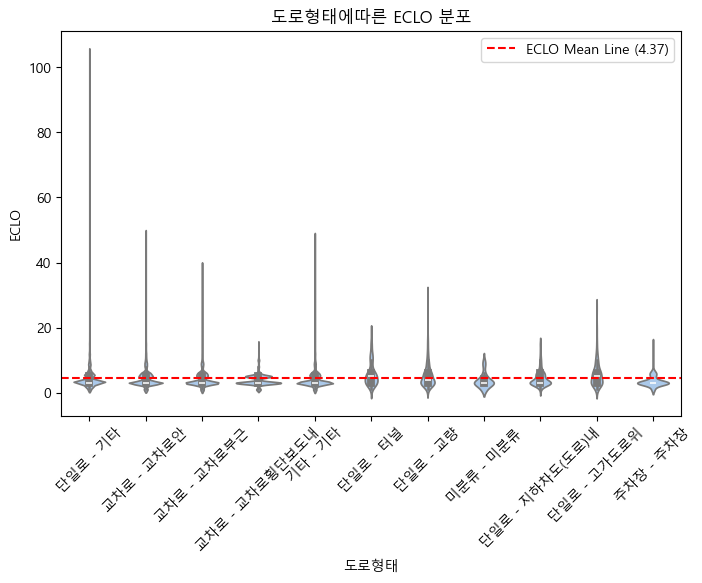

In [87]:
plt.figure(figsize=(8,5))
sns.violinplot(x='도로형태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("도로형태에따른 ECLO 분포")
plt.show()

단일로 - 터널, 단일로 - 고가도로위 도로형태 주목

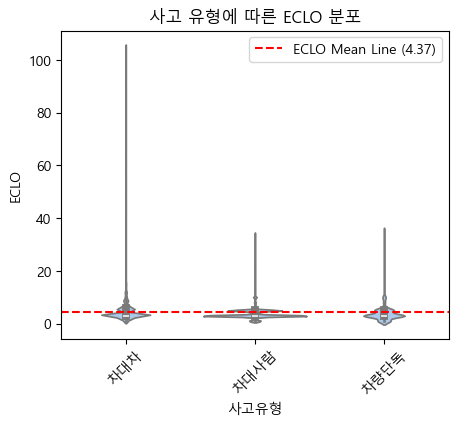

In [88]:
plt.figure(figsize=(5,4))
sns.violinplot(x='사고유형', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("사고 유형에 따른 ECLO 분포")
plt.show()

### 노면상태별 ECLO 평균 (bar plot)


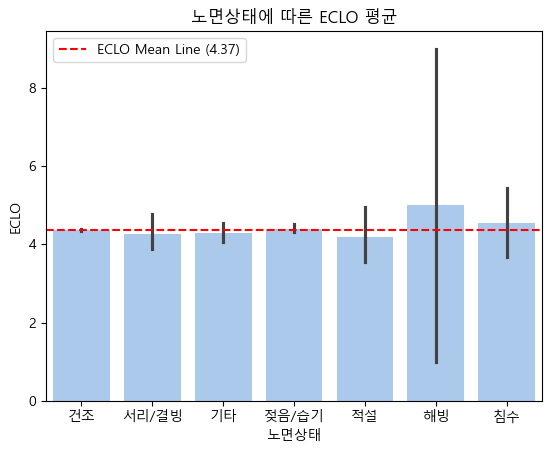

In [89]:
sns.barplot(x='노면상태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("노면상태에 따른 ECLO 평균")
plt.show()

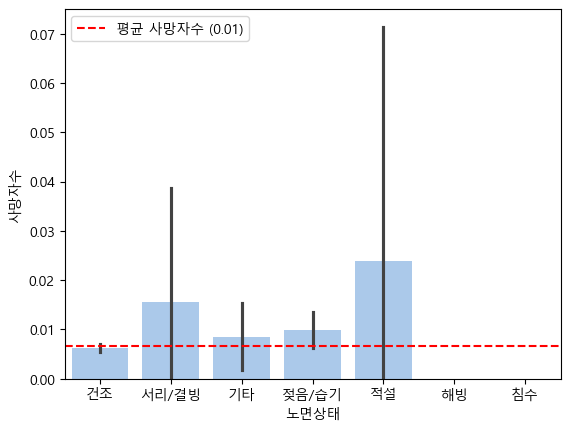

In [90]:
sns.barplot(x='노면상태', y='사망자수', data=train_df)
avg = train_df['사망자수'].mean()
plt.axhline(avg, ls='--', label=f'평균 사망자수 ({round(avg,2)})', color='r')
plt.legend()
plt.show()

노면 상태가 '침수'일때 주목

### 사고 빈도분석

#### 기상상태 / 사고유형

In [91]:
count_table = pd.crosstab(train_df['사고유형'],train_df['기상상태'])
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,180,30,6856,455,0,286
차대차,621,79,22133,1255,5,805
차량단독,35,7,857,59,0,35


In [92]:
## 차대차 사고비율이 언제나 가장 많다
count_table = pd.crosstab(train_df['사고유형'],train_df['기상상태'], normalize='columns')
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,0.215311,0.258621,0.229713,0.257207,0.000000,0.253996
차대차,0.742823,0.681034,0.741573,0.709440,1.000000,0.714920
차량단독,0.041866,0.060345,0.028714,0.033352,0.000000,0.031083


#### 기상상태 / 도로형태

In [93]:
count_table = pd.crosstab(train_df['도로형태'],train_df['기상상태'])
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
도로형태,,,,,,
교차로 - 교차로부근,140,17,4300,282,1,194
교차로 - 교차로안,144,25,6587,421,0,247
교차로 - 교차로횡단보도내,23,2,1159,115,0,40
기타 - 기타,166,14,2350,126,0,87
단일로 - 고가도로위,5,0,134,17,0,12
단일로 - 교량,10,3,255,11,0,16
단일로 - 기타,327,54,14647,779,3,514
단일로 - 지하차도(도로)내,2,1,160,12,1,3
단일로 - 터널,7,0,101,3,0,7


## 요일 / ECLO

In [100]:
train_df['ECLO'].describe()

count    33698.000000
mean         4.368004
std          2.905733
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        105.000000
Name: ECLO, dtype: float64

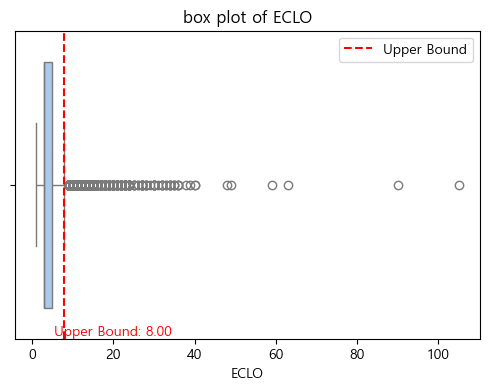

In [96]:
# ECLO upper bound 구하기

Q1 = train_df['ECLO'].quantile(0.25)
Q3 = train_df['ECLO'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR



plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=train_df)

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')

plt.legend()

plt.title("box plot of ECLO")
plt.show()

In [101]:
# ECLO 8.00를 기준으로 데이터 분리
high_ECLO_df = train_df[train_df['ECLO'] > 8.00]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 8.00]

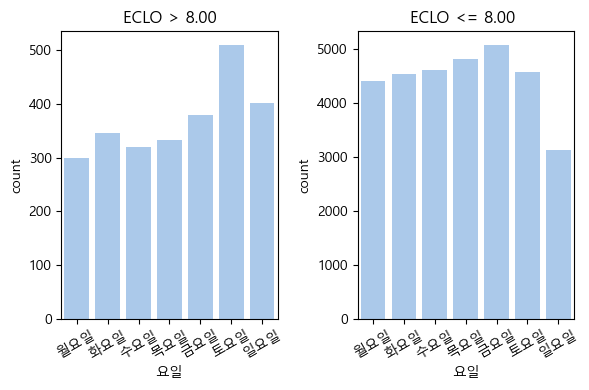

In [102]:
x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df, order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df, order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 8.00")
axes[1].set_title("ECLO <= 8.00 ")

plt.tight_layout()
plt.show()

ECLO 8.00 이상은 주말 발생 비율이 높다, 8.00 이하는 주말 사고 발생 비율이 더 낮다.

### 시간 / ECLO

In [105]:

time_pattern = r'(\d{4})년 (\d{1,2})월 (\d{1,2})일 (\d{1,2})시'

train_df[['연', '월', '일', 'hour']] = train_df['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', 'hour']] = train_df[['연', '월', '일', 'hour']].apply(pd.to_numeric)

high_ECLO_df = train_df[train_df['ECLO'] > 10.5]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 10.5]

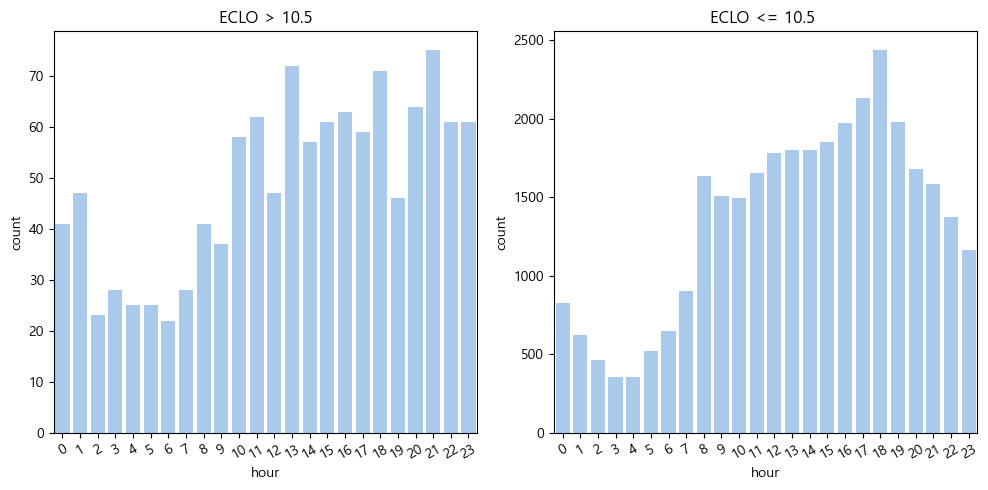

In [106]:
# 시간별 사고 발생 횟수

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='hour', data=high_ECLO_df,  ax=axes[0])
sns.countplot(x='hour', data=no_high_ECLO_df,  ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

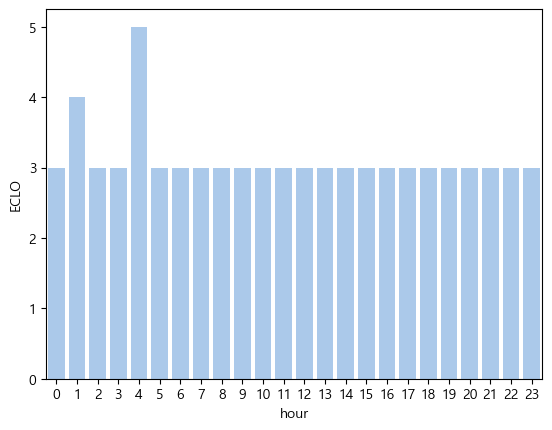

In [107]:
# 사고 발생 시간대별 ECLO median

sns.barplot(x='hour', y='ECLO', data=train_df, estimator=np.median, errorbar=None)
plt.show()

## 시간 / 사고형태 / 도로형태

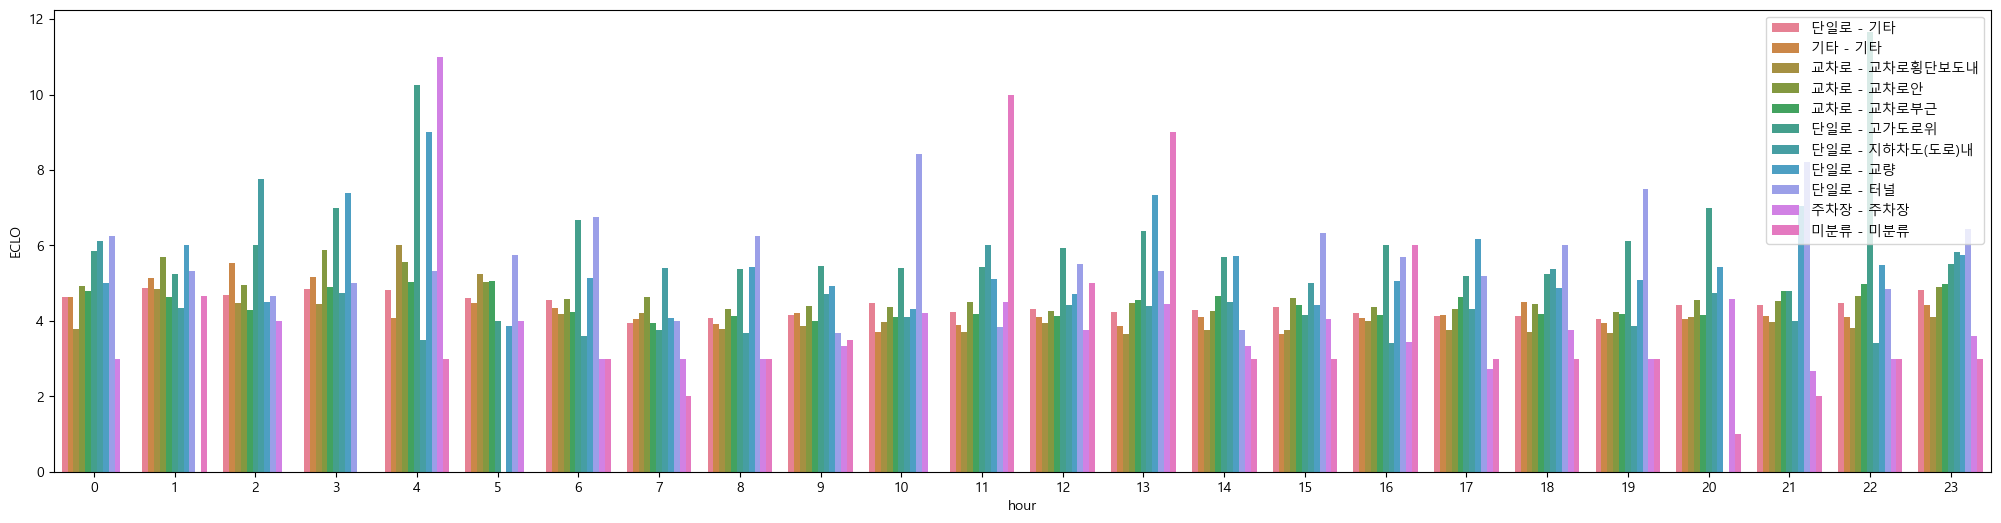

In [108]:
plt.figure(figsize=(25, 6))
sns.barplot(x='hour', y='ECLO', hue='도로형태', data=train_df, errorbar=None)
plt.legend(loc='upper right')
plt.show()